In [1]:
import pandas as pd
import numpy as np

In [205]:
data = pd.read_csv('data.csv')

In [206]:
data

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,OUT_KEY,BALLS,STRIKES,IS_RUNNER_ON_1B,IS_RUNNER_ON_2B,IS_RUNNER_ON_3B,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,0,0,0,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,1,0,0,0,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,1,1,0,0,0,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,1,0,0,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,1,0,1,1,0,0,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,2,1,0,1,0,0,...,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,2,1,1,1,0,0,...,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,2,2,1,1,0,0,...,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,2,2,2,1,0,0,...,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


Start by organizing the data. Make R/L irrelevant. Add columns for pitches in the inning/game for each pitcher and what inning it is for them in the game. Push unknown pitch types to known pitch types and one-hot encode pitch types.

In [207]:
data.HORIZONTAL_BREAK = np.where(data.THROW_SIDE_KEY == 'L', -1*data.HORIZONTAL_BREAK, data.HORIZONTAL_BREAK)
data.RELEASE_SIDE = np.where(data.THROW_SIDE_KEY == 'L', -1*data.RELEASE_SIDE, data.RELEASE_SIDE)
data.HORIZONTAL_APPROACH_ANGLE = np.where(data.THROW_SIDE_KEY == 'L', -1*data.HORIZONTAL_APPROACH_ANGLE, data.HORIZONTAL_APPROACH_ANGLE)

In [208]:
pitches_inning_count = 1
pitches_game_count = 1
pitcher_inning_count = 1
data['PITCHES_GAME'] = np.zeros(len(data))
data['PITCHES_INNING'] = np.zeros(len(data))
data['PITCHER_INNING'] = np.zeros(len(data))

for i, row in data.iterrows():
    if row.INNING_KEY == 1 and row.BATTER_IN_INNING_KEY == 1 and row.PITCH_NUMBER == 1:
        pitches_inning_count = 1
        pitches_game_count = 1
        pitcher_inning_count = 1
    elif row.PITCHER_KEY != data.iloc[i-1].PITCHER_KEY:
        pitches_inning_count = 1
        pitches_game_count = 1
        pitcher_inning_count = 1
    elif row.INNING_KEY != data.iloc[i-1].INNING_KEY:
        pitches_inning_count = 1
        pitcher_inning_count += 1
    
    data.at[i, 'PITCHES_GAME'] = pitches_game_count
    data.at[i, 'PITCHES_INNING'] = pitches_inning_count
    data.at[i, 'PITCHER_INNING'] = pitcher_inning_count
    pitches_inning_count += 1
    pitches_game_count += 1
    
            

In [209]:
cols = data.columns.tolist()
cols = cols[:4] + ['PITCHES_INNING', 'PITCHES_GAME', 'PITCHER_INNING'] + cols[4:-3]
data = data[cols]

In [210]:
data

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,PITCHES_INNING,PITCHES_GAME,PITCHER_INNING,OUT_KEY,BALLS,STRIKES,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,1.0,1.0,1.0,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,2.0,2.0,1.0,1,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,3.0,3.0,1.0,1,1,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,4.0,4.0,1.0,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,5.0,5.0,1.0,1,0,1,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,14.0,35.0,3.0,2,1,0,...,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,15.0,36.0,3.0,2,1,1,...,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,16.0,37.0,3.0,2,2,1,...,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,17.0,38.0,3.0,2,2,2,...,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


In [211]:
data.PITCHES_INNING = data.PITCHES_INNING.astype(int)
data.PITCHES_GAME = data.PITCHES_GAME.astype(int)
data.PITCHER_INNING = data.PITCHER_INNING.astype(int)

In [212]:
data

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,PITCHES_INNING,PITCHES_GAME,PITCHER_INNING,OUT_KEY,BALLS,STRIKES,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
0,197,1,1,1,1,1,1,0,0,0,...,-12.36030,2402.459961,100.764999,-2.42717,6.08550,6.46,1.612990,-5.76003,0.197045,1.91282
1,348,1,2,1,2,2,1,1,0,0,...,-10.95030,2273.459961,100.431000,-2.52253,5.97044,6.56,0.631016,-4.60990,-0.943079,2.87744
2,1072,1,2,2,3,3,1,1,1,0,...,4.35335,2314.459961,89.848999,-2.64242,5.89410,6.71,3.330480,-6.76551,0.012025,2.16833
3,420,1,3,1,4,4,1,1,0,0,...,4.27254,2340.459961,89.810997,-2.52429,5.90717,6.55,3.804230,-6.87764,0.584736,2.11319
4,198,1,3,2,5,5,1,1,0,1,...,1.62418,2445.459961,89.014397,-2.68096,6.10905,6.37,2.385210,-5.89879,-0.634335,3.45222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,22663,9,4,2,14,35,3,2,1,0,...,-8.54239,2139.620117,92.623001,-2.01709,6.18892,5.81,2.164890,-4.58267,0.750023,3.40322
9885,28642,9,4,3,15,36,3,2,1,1,...,0.60670,2104.620117,88.973701,-2.22191,6.09663,5.71,3.371970,-5.39125,0.872825,3.17087
9886,22664,9,4,4,16,37,3,2,2,1,...,-10.84110,2142.620117,92.265297,-1.99639,6.21051,5.83,0.063614,-5.65863,-0.988207,2.56097
9887,22665,9,4,5,17,38,3,2,2,2,...,-13.44000,1968.619995,84.541603,-2.25819,6.13594,5.60,0.865016,-6.89677,-0.278290,2.14642


In [213]:
data['PITCH_TYPE_TRACKED_KEY'].value_counts()

PITCH_TYPE_TRACKED_KEY
FB    3295
SW    1716
CF    1307
CH    1198
SL     909
SI     815
CB     469
SF     173
UN       4
KN       3
Name: count, dtype: int64

In [214]:
data.drop(columns=['THROW_SIDE_KEY', 'EVENT_RESULT_KEY', 'PITCH_RESULT_KEY'], inplace=True)

In [215]:
data.PITCHER_KEY.unique()

array([668881, 518585, 622065, 571882, 571656, 664139, 666157, 665665,
       664747, 668933, 656818, 570666, 669270, 643361, 668984, 613564,
       571912, 686651, 608371, 596133, 594902, 611093, 641427, 674285,
       682227, 671096, 650960, 691094, 621219, 594580, 622088, 686730,
       592741, 664028, 592527, 683175, 680689])

This may not be too many pitchers to one-hot encode, but in practice there would be. Let's try to use their mean HB and IVB as variables. 

In [216]:
data[data.PITCH_TYPE_TRACKED_KEY == 'UN']

,PID,INNING_KEY,BATTER_IN_INNING_KEY,PITCH_NUMBER,PITCHES_INNING,PITCHES_GAME,PITCHER_INNING,OUT_KEY,BALLS,STRIKES,...,HORIZONTAL_BREAK,SPIN_RATE_ABSOLUTE,RELEASE_SPEED,RELEASE_SIDE,RELEASE_HEIGHT,RELEASE_EXTENSION,HORIZONTAL_APPROACH_ANGLE,VERTICAL_APPROACH_ANGLE,PLATE_X,PLATE_Z
42,829,3,4,3,6,43,3,1,0,2,...,-5.946776,2542.063477,102.137627,-1.795476,5.877262,7.044741,3.881445,-4.398392,2.270842,2.887930
6970,16158,7,2,1,7,7,1,1,0,0,...,3.289670,2487.290039,82.292000,-1.851760,5.611410,6.750000,3.016360,-8.623690,0.618686,0.920696
6974,16568,7,2,5,11,11,1,1,1,2,...,-2.511450,604.291992,80.408600,-1.278540,6.087170,6.580000,0.151779,-4.468680,-0.919033,3.977570
6977,16569,7,3,3,14,14,1,2,0,2,...,3.506270,688.291992,80.475502,-1.296630,6.005200,6.790000,1.626350,-7.877090,-0.118080,1.752820


In [217]:
pitcher_grouped_counts = data.groupby(['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY']).size().sort_values()
pitcher_grouped_counts

PITCHER_KEY  PITCH_TYPE_TRACKED_KEY
643361       SI                          1
594580       CH                          1
668881       UN                          1
592741       CF                          2
592527       CB                          2
                                      ... 
682227       FB                        275
596133       FB                        301
671096       FB                        395
668933       SW                        449
             CF                        590
Length: 157, dtype: int64

Going to classify the unknown pitches as what pitch type of that pitcher it is closest to the mean of in terms of various metrics. Would consider a different model such as an XGBoost model, but given the disparity in the number examples of each pitch type and that knuckle ball only has 3 pitches, I am going to use this method that is similar in concept to KNN. I would consider KNN, but as we can see, there are instances where there are only 1 or two of a pitch type, so we would have to use K=1. We might as well just use the mean so we avoid outliers.

In [218]:
data_un = data[data.PITCH_TYPE_TRACKED_KEY == 'UN']
for i, pitch in data_un.iterrows():
    pitcher_pitches = data[(data.PITCHER_KEY == pitch.PITCHER_KEY) & (data.PITCH_TYPE_TRACKED_KEY != 'UN')]
    pitcher_pitches_means = pitcher_pitches.groupby('PITCH_TYPE_TRACKED_KEY')[['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 
                                                                               'SPIN_RATE_ABSOLUTE', 'RELEASE_SPEED']].mean().reset_index()
    pitcher_pitches_means['distance'] = np.sqrt((pitch.INDUCED_VERTICAL_BREAK - pitcher_pitches_means.INDUCED_VERTICAL_BREAK)**2
                                                + (pitch.HORIZONTAL_BREAK - pitcher_pitches_means.HORIZONTAL_BREAK)**2
                                                + (pitch.SPIN_RATE_ABSOLUTE - pitcher_pitches_means.SPIN_RATE_ABSOLUTE)**2
                                                + (pitch.RELEASE_SPEED - pitcher_pitches_means.RELEASE_SPEED)**2)
    pitch_type = pitcher_pitches_means.sort_values(by='distance').PITCH_TYPE_TRACKED_KEY
    print(pitch_type.iloc[0])
    data.at[i, 'PITCH_TYPE_TRACKED_KEY'] = pitch_type.iloc[0]

FB
SL
SF
SF


In [219]:
data['FB'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'FB', 1, 0)
data['SI'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'SI', 1, 0)
data['CF'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'CF', 1, 0)
data['CB'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'CB', 1, 0)
data['SL'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'SL', 1, 0)
data['SW'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'SW', 1, 0)
data['KN'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'KN', 1, 0)
data['SF'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'SF', 1, 0)
data['CH'] = np.where(data.PITCH_TYPE_TRACKED_KEY == 'CH', 1, 0)

In [220]:
data['PITCH_TYPE_TRACKED_KEY'].value_counts()

PITCH_TYPE_TRACKED_KEY
FB    3296
SW    1716
CF    1307
CH    1198
SL     910
SI     815
CB     469
SF     175
KN       3
Name: count, dtype: int64

In [221]:
pitcher_ptype_mean = data.groupby(['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY'])[['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'RELEASE_SIDE', 
                                                  'RELEASE_HEIGHT', 'RELEASE_EXTENSION']].mean().reset_index()
pitcher_ptype_sd = data.groupby(['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY'])[['INDUCED_VERTICAL_BREAK', 'HORIZONTAL_BREAK', 'RELEASE_SIDE', 
                                                  'RELEASE_HEIGHT', 'RELEASE_EXTENSION']].std().reset_index()
pitcher_ptype_groups = pitcher_ptype_mean.merge(pitcher_ptype_sd, on=['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY'], how='inner')
pitcher_ptype_groups = pitcher_ptype_groups.merge(pitcher_grouped_counts.reset_index(), on=['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY'], how='inner')

In [222]:
pitcher_ptype_groups

,PITCHER_KEY,PITCH_TYPE_TRACKED_KEY,INDUCED_VERTICAL_BREAK_x,HORIZONTAL_BREAK_x,RELEASE_SIDE_x,RELEASE_HEIGHT_x,RELEASE_EXTENSION_x,INDUCED_VERTICAL_BREAK_y,HORIZONTAL_BREAK_y,RELEASE_SIDE_y,RELEASE_HEIGHT_y,RELEASE_EXTENSION_y,0
0,518585,FB,16.209923,-8.144612,-1.467463,5.929799,6.753171,1.688585,2.204791,0.195747,0.106740,0.192551,123
1,518585,SF,2.744916,-4.722275,-1.345989,5.997786,6.748366,4.960667,3.839988,0.162268,0.090884,0.169113,151
2,518585,SL,6.668005,4.906664,-1.532421,5.853421,6.767737,3.609627,2.583618,0.185792,0.107655,0.177001,136
3,570666,CH,3.404863,-13.981303,-0.863321,6.113170,5.711569,3.302817,2.607218,0.151264,0.053432,0.108099,51
4,570666,FB,13.410357,-7.538684,-0.717861,6.073689,5.683421,2.048762,2.102666,0.179826,0.060172,0.096121,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,686730,SW,1.697294,14.547673,-1.954610,5.054229,6.451364,2.795330,3.136110,0.073114,0.064211,0.055575,22
151,691094,CF,9.906460,-2.518958,-2.604496,5.190397,6.182857,2.596918,2.739264,0.121916,0.066198,0.043094,7
152,691094,CH,3.904620,-12.859010,-2.238780,5.225292,6.267500,3.240230,2.223180,0.078715,0.040566,0.069024,8
153,691094,SI,10.389449,-14.912750,-2.325230,5.345305,6.197000,1.839047,1.526510,0.128084,0.044264,0.066341,10


In [223]:
pitcher_ptype_groups.rename(columns={0: 'Count'}, inplace=True)

In [224]:
pitcher_ptype_groups[pitcher_ptype_groups.Count >= 10].PITCH_TYPE_TRACKED_KEY.unique()

array(['FB', 'SF', 'SL', 'CH', 'SI', 'SW', 'CB', 'CF'], dtype=object)

In [225]:
avg_sd_ptypes = pitcher_ptype_groups[pitcher_ptype_groups.Count >= 10].groupby('PITCH_TYPE_TRACKED_KEY')[['INDUCED_VERTICAL_BREAK_y', 'HORIZONTAL_BREAK_y',
                                                                                                          'RELEASE_SIDE_y', 'RELEASE_HEIGHT_y',
                                                                                                          'RELEASE_EXTENSION_y']].mean().reset_index()

In [226]:
avg_sd_ptypes

,PITCH_TYPE_TRACKED_KEY,INDUCED_VERTICAL_BREAK_y,HORIZONTAL_BREAK_y,RELEASE_SIDE_y,RELEASE_HEIGHT_y,RELEASE_EXTENSION_y
0,CB,2.522802,2.240683,0.208742,0.074318,0.144209
1,CF,2.511904,2.248187,0.215459,0.080594,0.131807
2,CH,2.483457,2.191463,0.183909,0.073101,0.116680
3,FB,1.641711,2.271348,0.181568,0.086434,0.128324
4,SF,3.643438,3.086818,0.124828,0.074637,0.135857
5,SI,2.000033,1.765909,0.156460,0.080817,0.113527
6,SL,2.578578,2.542658,0.174820,0.086240,0.135139
7,SW,2.824822,3.127966,0.183556,0.073709,0.129485


In this dataset, there may not be too many pitchers to one-hot encode, but in practice with MLB data, it will be. So let's try to use their means as an independent variable. If the pitcher has less than 10 of a pitch type, we will give him one of the above standard deviations. Otherwise we will just give him hos own. This does not apply to the knuckleballs. 

In [227]:
for i, row in pitcher_ptype_groups.iterrows():
    if row.PITCH_TYPE_TRACKED_KEY != 'KN' and row.Count < 10:
        row.HORIZONTAL_BREAK_y = avg_sd_ptypes.HORIZONTAL_BREAK_y[avg_sd_ptypes.PITCH_TYPE_TRACKED_KEY == row.PITCH_TYPE_TRACKED_KEY].iloc[0]
        row.INDUCED_VERTICAL_BREAK_y = avg_sd_ptypes.INDUCED_VERTICAL_BREAK_y[avg_sd_ptypes.PITCH_TYPE_TRACKED_KEY == row.PITCH_TYPE_TRACKED_KEY].iloc[0]
        
        pitcher_ptype_groups.at[i, 'HORIZONTAL_BREAK_y'] = row.HORIZONTAL_BREAK_y
        pitcher_ptype_groups.at[i, 'INDUCED_VERTICAL_BREAK_y'] = row.INDUCED_VERTICAL_BREAK_y

In [228]:
data = data.merge(pitcher_ptype_groups, on=['PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY'], how='left')

Predict HB and IVB. Based on how many SDs the prediction is from the actual, calculate p-value. Do a one-way test, as humidity causes less dense air, so should have higher breaks.

In [230]:
x_horiz = data.drop(columns=['HORIZONTAL_BREAK', 'PID', 'PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY', 'PLATE_X', 'PLATE_Z', 'Count', 'RELEASE_SIDE_y', 'RELEASE_HEIGHT_y', 'RELEASE_EXTENSION_y'])
x_vert = data.drop(columns=['INDUCED_VERTICAL_BREAK', 'PID', 'PITCHER_KEY', 'PITCH_TYPE_TRACKED_KEY', 'PLATE_X', 'PLATE_Z', 'Count', 'RELEASE_SIDE_y', 'RELEASE_HEIGHT_y', 'RELEASE_EXTENSION_y'])
y_horiz = data.HORIZONTAL_BREAK
y_vert = data.INDUCED_VERTICAL_BREAK

In [232]:
import xgboost as xgb

In [252]:
linear_model_horiz = xgb.XGBRegressor(reg_lambda = 1.3)
linear_model_horiz.fit(x_horiz, y_horiz)
predictions_horiz = linear_model_horiz.predict(x_horiz)
r_squared = linear_model_horiz.score(x_horiz, y_horiz)
r_squared

0.9890405451751832

It's gonna overfit, but we need to predict all of the data and we are without a training set.

In [254]:
linear_model_vert = xgb.XGBRegressor(reg_lambda = 1.3)
linear_model_vert.fit(x_vert, y_vert)
predictions_vert = linear_model_vert.predict(x_vert)

In [255]:
data['predictions_horiz'] = predictions_horiz
data['predictions_vert'] = predictions_vert

Text(0.5, 1.0, 'Actual vs Predicted Horizontal Break')

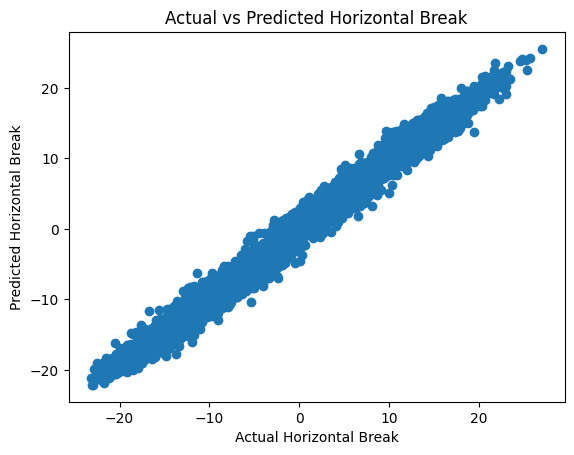

In [268]:
import matplotlib.pyplot as plt

plt.scatter(data.HORIZONTAL_BREAK, data.predictions_horiz)
plt.xlabel('Actual Horizontal Break')
plt.ylabel('Predicted Horizontal Break')
plt.title('Actual vs Predicted Horizontal Break')


Text(0.5, 1.0, 'Actual vs Predicted Vertical Break')

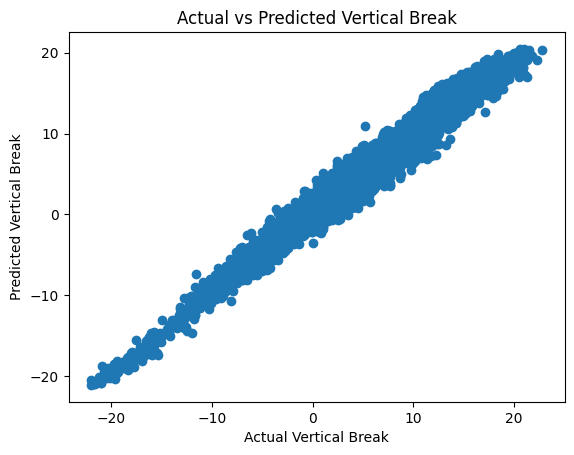

In [270]:
plt.scatter(data.INDUCED_VERTICAL_BREAK, data.predictions_vert)
plt.xlabel('Actual Vertical Break')
plt.ylabel('Predicted Vertical Break')
plt.title('Actual vs Predicted Vertical Break')

In [262]:
from scipy.stats import chi2

data['z_horiz'] = (data.HORIZONTAL_BREAK - data.predictions_horiz) / data.HORIZONTAL_BREAK_y
data['z_vert'] = (data.INDUCED_VERTICAL_BREAK - data.predictions_vert) / data.INDUCED_VERTICAL_BREAK_y

data['chi2_stat'] = data['z_horiz']**2 + data['z_vert']**2

data['p_value'] = np.where((data.z_horiz > 0) & (data.z_vert > 0), 1 - chi2.cdf(data['chi2_stat'], 2), 1)
# data['p_value'] = 1 - chi2.cdf(data['chi2_stat'], 2)

<Axes: >

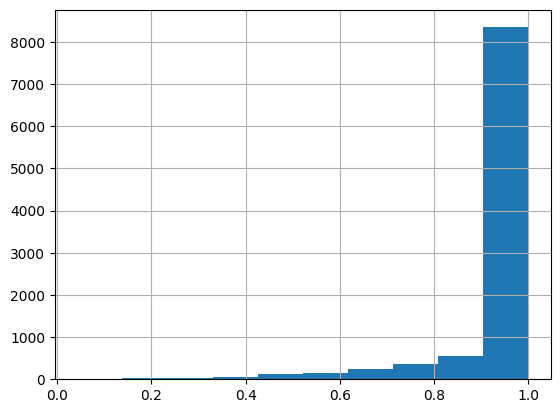

In [263]:
data.p_value.hist()

In [265]:
data['DEWPOINT_AFFECTED'] = 1-data.p_value

In [267]:
data[['PID', 'DEWPOINT_AFFECTED']].to_csv('submission.csv')